https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
Dataset = pd.read_csv("/content/drive/MyDrive/Academic Year 2022-23/DMBI/Dataset.csv")
x = Dataset.iloc[:, :-1].values
y = Dataset.iloc[:, -1].values
print(x)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No ' 'Yes' 'No ' 'No ' 'Yes' 'Yes' 'No ' 'Yes' 'No ' 'Yes']


In [ ]:
from sklearn.impute import SimpleImputer
imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputa.fit(x[:, 1:3])
# Repalcing the missing value using transform method
x[:, 1:3] = imputa.transform(x[:, 1:3])
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
print(x)


[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 1)
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
print(y_test)

[0 1]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we only aply the feature scaling on the features other than dummy variables.
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.fit_transform(x_test[:, 3:])
print(x_train)
print(x_test)


[[0.0 0.0 1.0 -0.19159184384578554 -1.0781259408412427]
 [0.0 1.0 0.0 -0.014117293757057846 -0.07013167641635404]
 [1.0 0.0 0.0 0.5667085065333239 0.6335624327104546]
 [0.0 0.0 1.0 -0.3045301939022487 -0.307866172742979]
 [0.0 0.0 1.0 -1.901801144700799 -1.4204636155515822]
 [1.0 0.0 0.0 1.1475343068237056 1.2326533634535488]
 [0.0 1.0 0.0 1.4379472069688966 1.5749910381638883]
 [1.0 0.0 0.0 -0.7401495441200352 -0.5646194287757336]]
[[0.0 1.0 0.0 -1.0 -1.0]
 [1.0 0.0 0.0 1.0 1.0]]


Another example

In [ ]:
path='https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/titanic.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    ##data visualization
import seaborn as sns
titanic_data=pd.read_csv(path)
titanic_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
type(titanic_data)

pandas.core.frame.DataFrame

In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
type(titanic_data['Name'].head())
type(titanic_data[['Name']].head())

pandas.core.frame.DataFrame

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


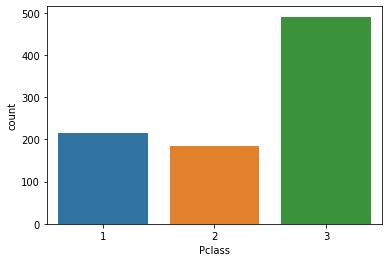

In [ ]:
###Analysing data on graph
sns.countplot(titanic_data['Pclass']) # plot for survived ,sex,pclass using seaborn
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


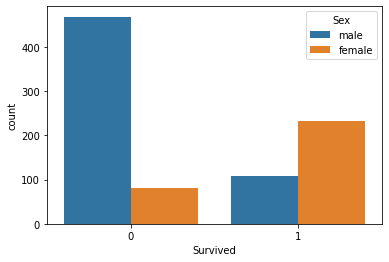

In [ ]:
sns.countplot(titanic_data['Survived'],hue=titanic_data['Sex']) # plot for survived filtering sex  using seaborn
plt.show()

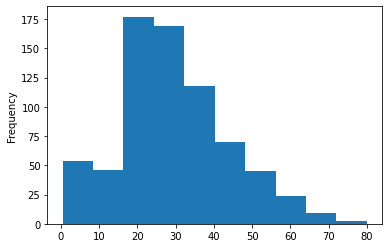

In [ ]:
titanic_data['Age'].plot.hist()  ##analyzeages of passengers

data wrangling
data cleaning


In [ ]:
titanic_data.head(2)
titanic_data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)   ###delete unnecessary col notrequired for current,inplace will replacedataframe to remove col-axis=1,row-0

checking nulls

In [ ]:
titanic_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


In [ ]:
titanic_data.isnull().sum()  ##sum ofnulls in each col

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [ ]:
mean_age=titanic_data['Age'].mean()
mean_age=np.round(mean_age,2)
mean_age

29.7

In [ ]:
titanic_data['Age'].fillna(mean_age,inplace=True)###replace null by mean
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [ ]:
sex=pd.get_dummies(titanic_data['Sex'])###male female to0 or 1
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:

pclass=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [ ]:
titanic_data=pd.concat([titanic_data,sex,pclass],axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,male,2,3
0,0,3,male,22.0,1,0,1,0,1
1,1,1,female,38.0,1,0,0,0,0
2,1,3,female,26.0,0,0,0,0,1
3,1,1,female,35.0,1,0,0,0,0
4,0,3,male,35.0,0,0,1,0,1


In [ ]:
titanic_data.drop(['Sex','Pclass'],axis=1,inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,male,2,3
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,0
4,0,35.0,0,0,1,0,1


In [ ]:
titanic_data.rename(columns={'male':"sex",2:"pclass_2",3:"plcass_3"},inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,sex,pclass_2,plcass_3
0,0,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,1,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,0
4,0,35.0,0,0,1,0,1


Histogram (Binning using boundary level) using Excel STEPS:
1.	First, enter the bin numbers (upper levels) in the range C4:C14.



2.	On the Data tab, in the Analysis group, click Data Analysis.

3.	Select Histogram and click OK.

4.	Select the range A2:A650.

5.	Click in the Bin Range box and select the range C4:C8.

6.	Click the Output Range option button, click in the Output Range box, and select cell G3.

7.	Check Chart Output.


8.	Click OK





Histogram (Binning using boundary level) using Python Script STEPS:
1.	Importing required libraries.
2.	Uploading dataset files on Jupyter Notebook.
3.	Reading uploaded file.

4.	Printing the first five rows from the Dataset.
5.	Displaying the detailed information of columns used in Dataset.


6.	Printing the column selected from Dataset.
7.	Finding the Minimum and Maximum values from the selected column


8.	Plotting the details of the selected column using Histogram








In [ ]:
#How to divide dataset into train and test
# import packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# importing data
df = pd.read_csv("/content/drive/MyDrive/Academic Year 2022-23/DMBI/Dataset.csv")

# head of the data
print(df.head())

X= df.drop('Purchased',axis=1)
y=df['Purchased']

# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=104,test_size=0.25,shuffle=True)

# printing out train and test sets

print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())


   Country   Age   Salary Purchased
0   France  44.0  72000.0       No 
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0       No 
3    Spain  38.0  61000.0       No 
4  Germany  40.0      NaN       Yes
X_train : 
4    40.0
9    37.0
0    44.0
3    38.0
8    50.0
Name: Age, dtype: float64

X_test : 
2    30.0
7    48.0
6     NaN
Name: Age, dtype: float64

y_train : 
4    Yes
9    Yes
0    No 
3    No 
8    No 
Name: Purchased, dtype: object

y_test : 
2    No 
7    Yes
6    No 
Name: Purchased, dtype: object
